In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from train_model import SimpleNN
from mfbox import gokunet_beta


In [2]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


/home/yang/miniconda3/envs/pytorch-env/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
# load input data
x_test = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/test_input.txt")
# normalize input data
bounds = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/input_limits.txt")
# x_test = (x_test - bounds[:,0]) / (bounds[:,1] - bounds[:,0])

y_test = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/test_output.txt")
y_test = 10**y_test


In [4]:
# load model
emu = gokunet_beta(path_LA="models/pre_N_L1A_z0/best_model.pth",path_HA="models/pre_N_LHA_z0/best_model.pth", path_L2="models/pre_N_L2_z0/best_model.pth", path_HB="models/pre_N_LHB_z0/best_model.pth", bounds_path="data/pre_N_xL-H_stitch_z0/input_limits.txt")

In [5]:
k, y_h_pred = emu.predict(x_test)
k_1, y_l1_pred = emu.predict_LA(x_test)
k_2, y_l2_pred = emu.predict_L2(x_test)

after normalization [[0.02777778 0.02777833 0.361111   0.694445   0.027778   0.36111167
  0.69444445 0.36111111 0.52777786 0.6944445 ]
 [0.47222222 0.97222167 0.916667   0.305555   0.638888   0.91666667
  0.19444447 0.30555556 0.25       0.63888888]
 [0.86111111 0.41666667 0.194444   0.41666625 0.972222   0.194445
  0.58333333 0.75       0.86111143 0.13888883]
 [0.19444444 0.805555   0.527778   0.86111125 0.916666   0.25
  0.5277778  0.08333333 0.80555571 0.47222222]
 [0.52777778 0.58333333 0.25       0.58333375 0.083334   0.75
  0.13888887 0.91666667 0.41666643 0.91666667]
 [0.75       0.194445   0.861111   0.0277775  0.472222   0.52777783
  0.91666667 0.47222222 0.30555571 0.1944445 ]
 [0.13888889 0.47222167 0.694444   0.5277775  0.361112   0.08333333
  0.08333333 0.69444444 0.47222214 0.08333333]
 [0.58333333 0.694445   0.416667   0.13888875 0.305556   0.6944445
  0.63888889 0.13888889 0.97222214 0.86111117]
 [0.80555556 0.25       0.305556   0.91666625 0.75       0.63888883
  0.805

In [6]:
k_1.shape

(32,)

In [7]:
k.shape

(64,)

In [8]:
y_l1_pred.shape

(12, 32)

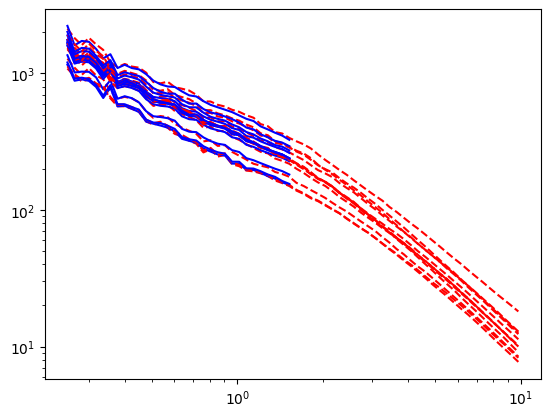

In [9]:
# Plot results
# plt.scatter(x, y, label="True Data")
# load k values

# plot in log-log scale
plt.figure()

# loop over all the test data
for i in range(y_h_pred.shape[0]):
    plt.loglog(k, y_test[i], color="red", linestyle="--", label="True Data") 
    # plt.loglog(k, y_h_pred[i], color="red", label="NN Prediction")
    plt.loglog(k_1, y_l1_pred[i], color="blue", label="NN L1 Prediction")
# plt.legend()
plt.show()

In [10]:
k.max()

np.float64(9.825361078106937)

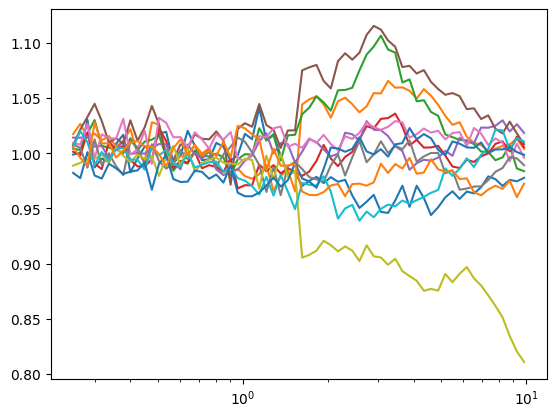

In [11]:
# plot ratio
plt.figure()

for i in range(y_h_pred.shape[0]):
    plt.semilogx(k, y_h_pred[i] / y_test[i])
# limit the y-axis
# plt.ylim(0.8, 1.2)
plt.show()

In [12]:
# calculate relative mean absolute error
rel_err = np.mean(np.abs(y_h_pred - y_test) / y_test)
print("Relative Mean Absolute Error:", rel_err)

Relative Mean Absolute Error: 0.023384852569643604


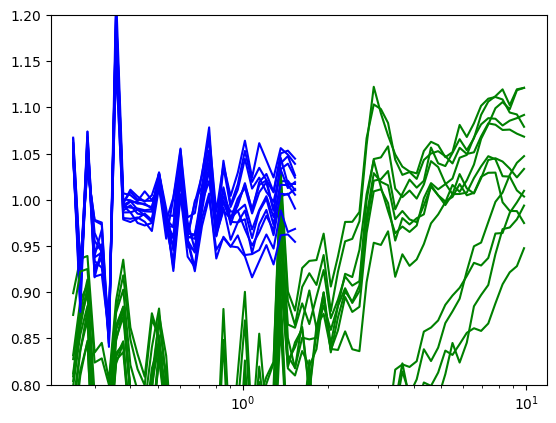

In [13]:
# plot ratio
plt.figure()

for i in range(y_h_pred.shape[0]):
    # plt.semilogx(k, y_h_pred[i] / y_test[i])
    plt.semilogx(k_1, y_l1_pred[i] / y_test[i][:32], color="blue")
    plt.semilogx(k_2, y_l2_pred[i] / y_test[i], color="green")
# limit the y-axis
plt.ylim(0.8, 1.2)
plt.show()

In [14]:
# calculate mean square error (log scale)
mse = np.mean((np.log10(y_h_pred) - np.log10(y_test))**2)
print("Mean Square Error:", mse)

Mean Square Error: 0.0002497157087630576


In [15]:
# load HF training data
x_th = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/train_input_fidelity_1.txt")
y_th = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/train_output_fidelity_1.txt")
y_th = 10**y_th

In [16]:
# compare the prediction with the training data
_, y_th_pred = emu.predict(x_th)

after normalization [[0.1633     0.03198667 0.594276   0.98148125 0.513468   0.38888833
  0.43939393 0.73905778 0.26094286 0.13973067]
 [0.41582444 0.65824833 0.281145   0.35185125 0.786196   0.29461333
  0.18686867 0.17676767 0.94107714 0.9545455 ]
 [0.96464667 0.67845167 0.776094   0.17340125 0.112794   0.70538717
  0.94107747 0.51683556 0.34175071 0.5976431 ]
 [0.17003333 0.44612833 0.43266    0.4124575  0.018518   0.16666667
  0.02861953 0.15993267 0.64478143 0.34848485]
 [0.38215444 0.06229    0.988215   0.28787875 0.930976   0.65824917
  0.36531987 0.67171667 0.31818214 0.81986533]
 [0.73232333 0.73569    0.176768   0.71548875 0.580808   0.74242417
  0.98821547 0.64814778 0.88383857 0.29797983]
 [0.06229    0.50673333 0.732323   0.87037    0.941078   0.30808
  0.43602693 0.44612778 0.718855   0.13299667]
 [0.63131333 0.77272667 0.378788   0.10606    0.355218   0.89393933
  0.71212121 0.03535356 0.15319857 0.3989899 ]
 [0.90067333 0.20707    0.217172   0.61111125 0.149832   0.3922

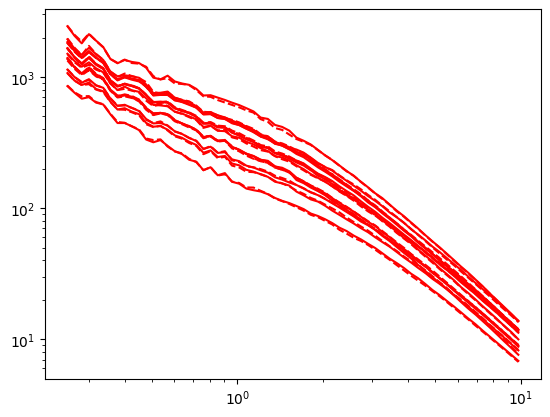

In [17]:


# plot in log-log scale
plt.figure()

# loop over all the test data 
for i in range(y_h_pred.shape[0]):
    plt.loglog(k, y_th[i], color="red", linestyle="--", label="True Data") 
    plt.loglog(k, y_th_pred[i], color="red", label="NN Prediction")
# plt.legend()
plt.show()


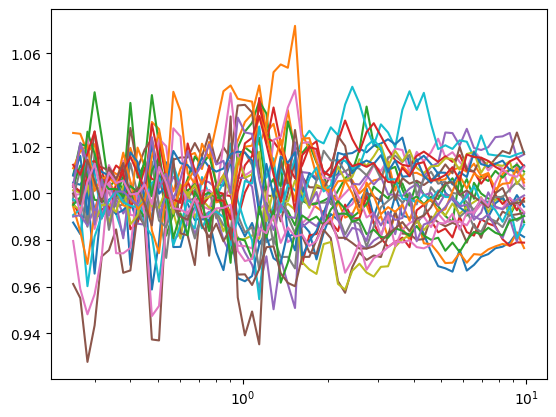

In [18]:
# plot ratio
plt.figure()

for i in range(y_th_pred.shape[0]):
    plt.semilogx(k, y_th_pred[i] / y_th[i])
# limit the y-axis
# plt.ylim(0.8, 1.2)
plt.show()

In [19]:
# calculate mean square error (log scale)
mse = np.mean((np.log10(y_th_pred) - np.log10(y_th))**2)
print("Mean Square Error:", mse)

Mean Square Error: 5.065301286561792e-05
